# Predicción de falla cardiaca usando técnicas de aprendizaje de máquinas

**Integrantes:**

* Fernando Berrocal Vergara (https://www.linkedin.com/in/fernando-antonio-berrocal-vergara/)
* Camilo Guarin Mass
* Oswaldo Peña Rojas
* Harold Ochoa Buitrago

# Descripción del conjunto de datos

## Contexto de los datos

Las enfermedades cardiovasculares (CVDs) son el causa número 1 de muertes a nivel global, tomando 17.9 millones de vidas cada año, las cuales cuenta como el 31% de todas las muertes a nivel global. Cuatro de cada 5 CVDs se producen debido a ataques o fallas en el corazón, y un tercio de estas muertes ocurren a personas de temprana edad debajo de los 70 años de edad. Las fallas en el corazón son eventos comunes causados por CVDs y este dataset contiene 11 caracteristicas que pueden ser usadas para predecir una posible enfermedad del corazón.


## Composición de los datos

El conjunto de datos escogido tiene la siguiente información:

- **Age:** Edad del paciente en años
- **Sex:** Sexo del paciente (**M:** Masculino, **F:** Femenino)
- **ChestPainType:** Tipo de dolor en el pecho (**TA:** Angina típica, **ATA:** Angina atípica, **NAP:** Sin dolor anginal, **ASY:** Asintomático)
- **RestingBP:** Presión de la sangre en reposo (mmHg)
- **Cholesterol:** Colesterol sérico (mm/dl)
- **FastingBS:** Azúcar (glucemia) en ayunas (**1:** Si es mayor a 120 mg/dl, **0:** En otro caso)
- **RestingECG:** Resultados del electrocardiograma en reposo (**Normal:** Normal, **ST:** Tiene una anomalía en la onda ST-T (inversiones en la onda T y/o elevación o depresón del ST mayor a 0.05 mV), **LVH:** Muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes)
- **MaxHR:** Frecuencia cardiaca máxima alcanzada (valor numérico entre 60 y 202)
- **ExerciseAngina:** Angina inducida por el ejercicio (**Y:** Yes, **N:** No)
- **Oldpeak:** Depresión del ST inducida por el ejercicio en relación con el reposo
- **ST_Slope:** Pendiente del segmento ST en ejercicio máximo (**Up:** Ascendente, **Flat:** Plana, **Down:** Descendentet]
- **HeartDisease:** Si tiene o no una enfemedad cardiovascular (Etiqueta de salida) (**1:** Si la tiene, **0:** No la tiene)

## Origen de los datos

Este dataset fue creado combinando diferentes conjuntos de datos disponibles y de fuentes independientes. En este dataset, se combinan 5 conjuntos de datos con información del corazón de varios pacientes con 11 características comunes. Estos 5 datasets combinados son los siguientes: 

- **Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.:** 303 ejemplos
- **Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.:** 294 ejemplos
- **University Hospital, Zurich/Bas, Switzerland: William Steinbrunn, M.D. y Matthias Pfisterer, M.D.:** 123 ejemplos
- **V.A. Medical Center, Long Beach: Robert Detrano, M.D., Ph.D.:** 200 ejemplos
- **UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science. Stalog (Heart) Data Set:** 270 ejemplos
 
**Total:** 1190 ejemplos. **Duplicados:** 272 ejemplos. **Final:** 918 ejemplos

Cada dataset puede ser encontrado en el repositorio de la Universidad de California en Irvine (UCI Machine Learning Repository):
- http://archive.ics.uci.edu/ml/datasets/Heart+Disease
- https://archive.ics.uci.edu/ml/datasets/statlog+(heart)

Datos tomados de
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## Objetivo del análisis

El problema a desarrollar es un problema aplicable al sector de la salud,
acerca de las enfermedades cardiacas. Es bien sabido que las
enfermedades cardiacas son una de las principales causas de muerte a
nivel mundial, por lo que es de mucha importancia la realización de
estudios que permitan el pronóstico temprano de la presencia de estas
afecciones en pacientes para la toma de decisiones en su estilo de vida
que ayuden a reducir el riesgo de complicaciones cardiacas.

El objetivo del problema es poder pronosticar la presencia de estas
enfermedades cardiacas en los pacientes lo antes posible con el fin de tomar medidas que ayuden a prevenirlas o a reducir el riesgo de padecerlas.

# Análisis de los datos

Se importan las librerías necesarias para la implementación del proyecto

In [2]:
# Importar librerias requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics.cluster import normalized_mutual_info_score
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

Se lee el conjunto de datos

In [3]:
data = pd.read_csv('heart.csv')
print("Shape:", data.shape)
data.head()

Shape: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


Los datos estan compuestos por 12 variables (descritas anteriormente) y 918 registros.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Se identifica que no existen datos nulos

In [5]:
missing = data.isnull().sum()
print("Porcentaje de datos nulos:", len(missing[missing>0]*100/len(data)))


Porcentaje de datos nulos: 0


Se identifica que no existen datos duplicados

In [6]:
print("Número de duplicados:", data.duplicated().sum())

Número de duplicados: 0


# Distribución y limitantes

Se declaran como datos tipo `category` las columnas o características categóricas.

In [7]:
data['Sex'] = data['Sex'].astype('category')
data['ChestPainType'] = data['ChestPainType'].astype('category')
data['RestingECG'] = data['RestingECG'].astype('category')
data['ExerciseAngina'] = data['ExerciseAngina'].astype('category')
data['ST_Slope'] = data['ST_Slope'].astype('category')
data['FastingBS'] = data['FastingBS'].astype('category')
data['HeartDisease'] = data['HeartDisease'].astype('category')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(1), int64(4)
memory usage: 43.2 KB


Se observa que la variable objetivo esta un poco desbalanceada.

In [9]:
data["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Se grafica el `pairplot`

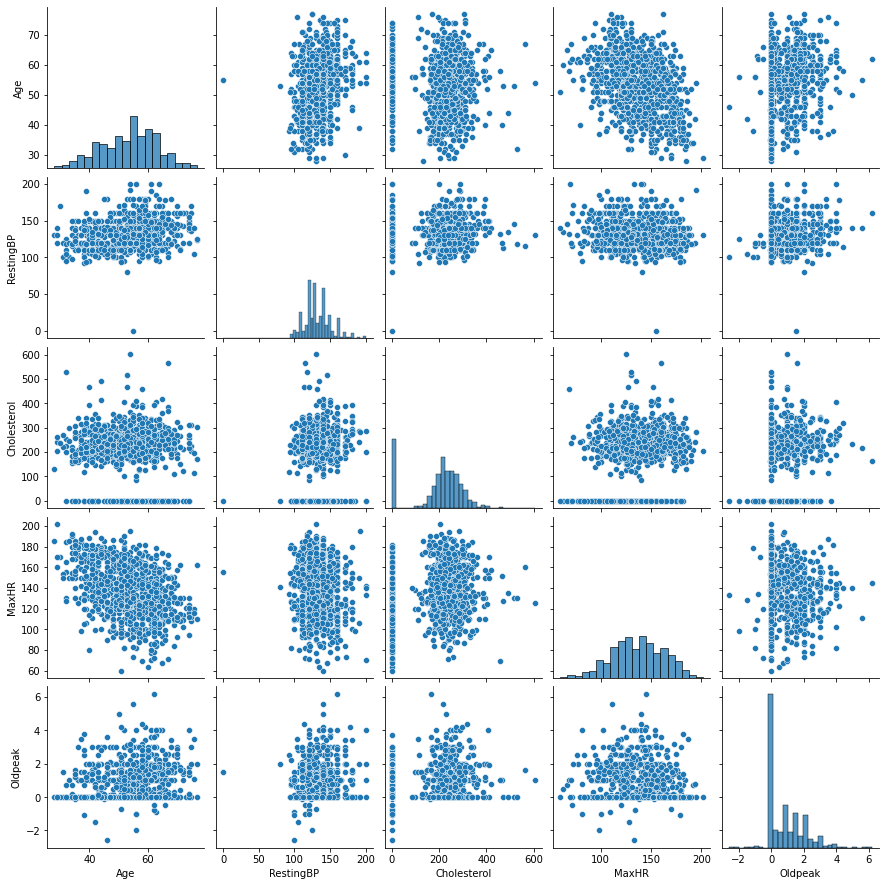

In [10]:
sns.pairplot(data)
plt.show()

Observando los gráficos de dispersión podemos notar que entre las diferentes variables no existe una relación marcada que permita inferir que el comportamiento de una determine el de otra, solo en el caso de comparación de la variable *Age* con *MaxHR* (frecuencia cardíaca máxima alcanzada) vemos un tipo de correlación negativa no tan marcada en el que para algunas edades más pequeñas, existe una mayor frecuencia cardíaca máxima alcanzada. 

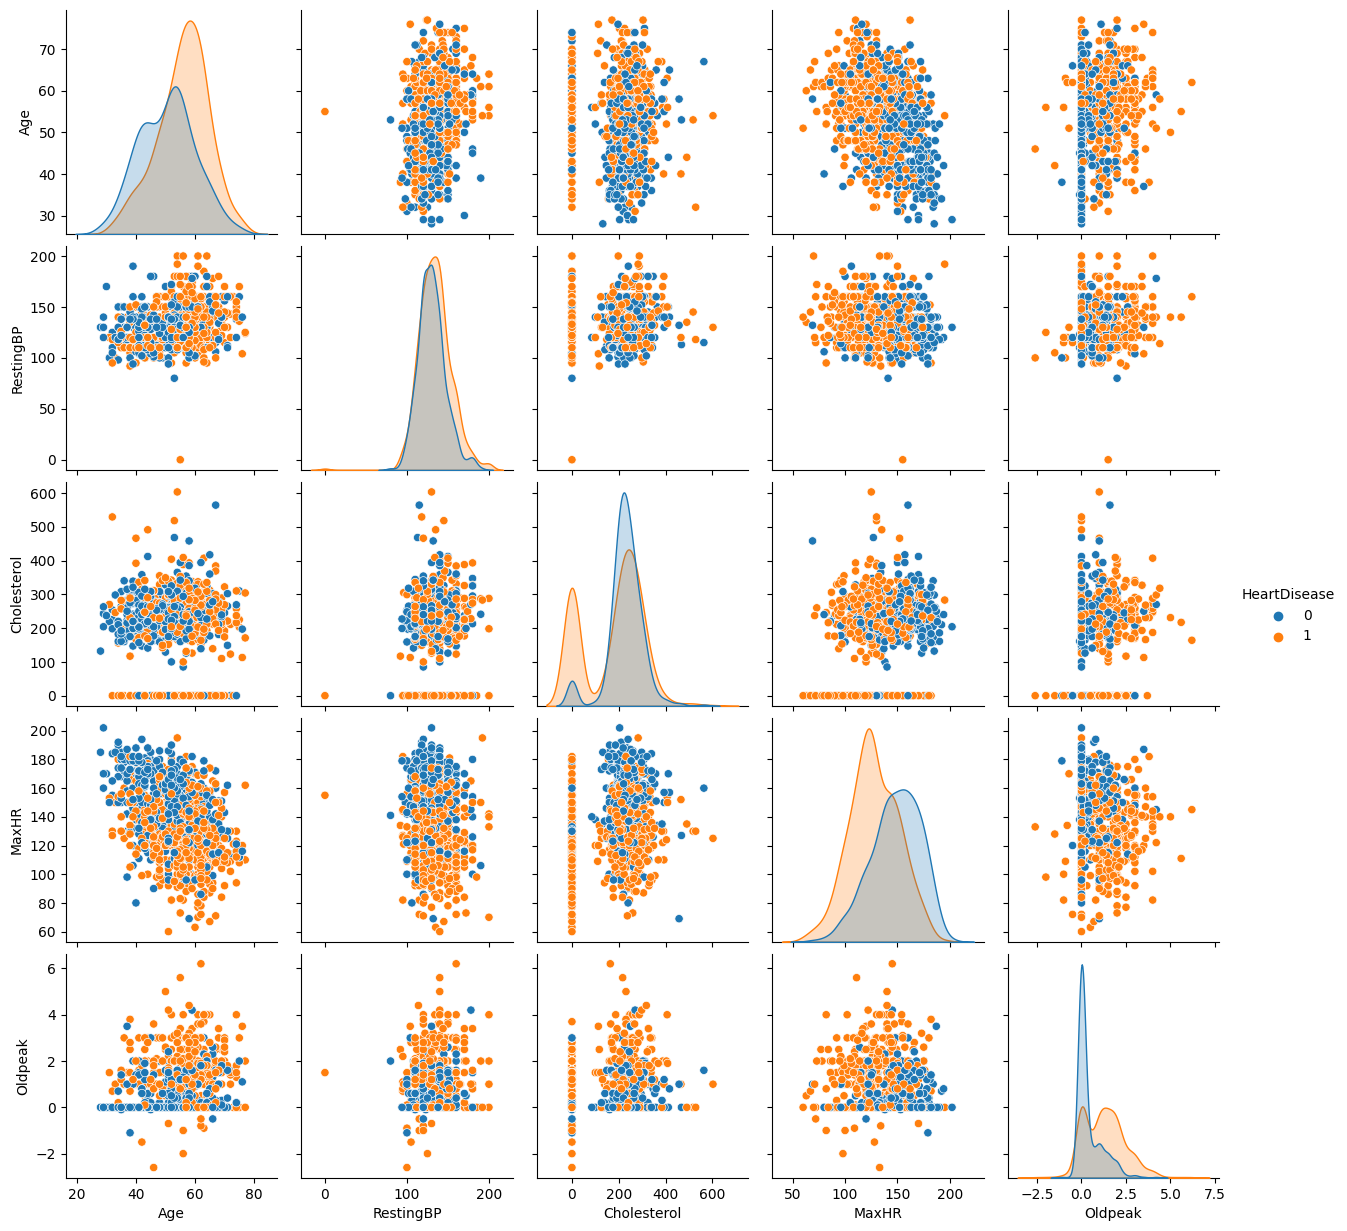

In [11]:
sns.pairplot(data, hue='HeartDisease')
plt.show()

Para la variable *Age* vemos que las personas más propensas a sufrir enfermedades cardíacas son las personas con edades mayores a 60 como podría esperarse. Para el caso de la variable *RestingBP* (presión arterial en reposo) notamos que la proporción entre las personas con enfermedad cardíaca y las que no lo tienen es similar en cuanto al tipo de presión arterial, por lo que nos puedes dar a entender que la variable no es significativa para el problema.

# Análisis univariable

## Variables numéricas

Se imprimen los datos estadísticos de las columnas numéricas

In [12]:
data.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,136.81,0.89
std,9.43,18.51,109.38,25.46,1.07
min,28.00,0.00,0.00,60.00,-2.60
25%,47.00,120.00,173.25,120.00,0.00
50%,54.00,130.00,223.00,138.00,0.60
75%,60.00,140.00,267.00,156.00,1.50
max,77.00,200.00,603.00,202.00,6.20


Se imprime el coeficiente de variación por cada característica numérica

In [13]:
print("Coeficiente de variación")
data.std()/data.mean()

Coeficiente de variación


Age           0.18
RestingBP     0.14
Cholesterol   0.55
MaxHR         0.19
Oldpeak       1.20
dtype: float64

De acuerdo al coeficiente de variación, el cuál nos da una idea de la volatilidad de las variables, tenemos que _Choresterol_ tiene una volatilidad media y _Oldpeak_ presenta una alta volatilidad.

Se calcula la asimetría de la distribución de las variables numéricas

In [14]:
data.skew()

Age           -0.20
RestingBP      0.18
Cholesterol   -0.61
MaxHR         -0.14
Oldpeak        1.02
dtype: float64

De acuerdo a la medida de asimetría realizada, tenemos que:

* La variable _Age_ presenta una asimetría negativa ya que su distribución se alarga para valores inferiores a la media.
* La variable _RestingBP_ presenta una asimetría positiva ya que su distribución se alarga para valores superiores a la media.
* La variable _Cholesterol_ presenta una asimetría negativa ya que su distribución se alarga para valores inferiores a la media.
* La variable _MaxHR_ presenta una asimetría negativa ya que su distribución se alarga para valores inferiores a la media.
* La variable _Oldpeak_ presenta una asimetría positiva ya que su distribución se alarga para valores superiores a la media.

Se calcula el coeficiente de Curtosis. Si los valores son negativos indican que la concentración de los valores no es alta alrededor de un valor.

In [15]:
data.kurtosis()

Age           -0.39
RestingBP      3.27
Cholesterol    0.12
MaxHR         -0.45
Oldpeak        1.20
dtype: float64

Se calcula los valores de mayor frecuencia de aparición (moda) por cada característica.

In [16]:
data.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.00,Flat,1


Se genera el histograma para la variable _Age_.

[]

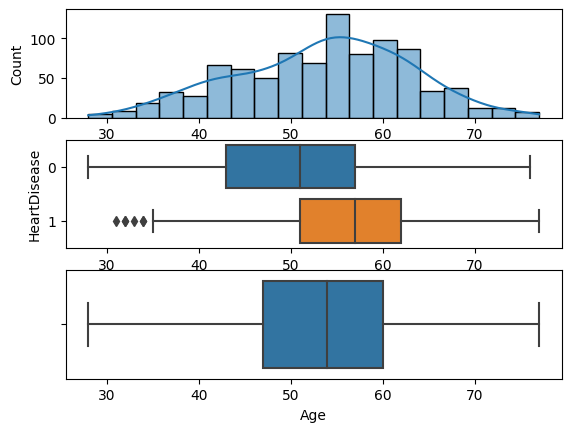

In [25]:
fig, axes = plt.subplots(3, 1)

sns.histplot(data=data, x="Age", kde=True, ax=axes[0])
sns.boxplot(x="Age", y="HeartDisease", data=data, ax=axes[1])
sns.boxplot(x="Age", data=data, ax=axes[2])
plt.plot()

La distribución de datos de la variable _Age_ indica que el conjunto de datos tiene una tendencia normal, no se evidencia datos atípicos.

Se genera el histograma para la variable _RestingBP_.

[]

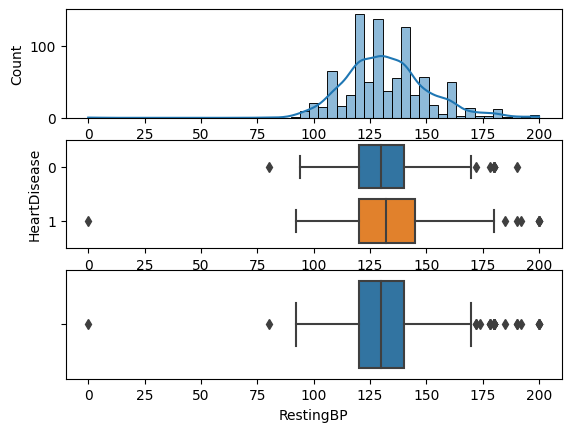

In [28]:
fig, axes = plt.subplots(3, 1)

sns.histplot(data=data, x="RestingBP", kde=True, ax=axes[0])
sns.boxplot(x="RestingBP", y="HeartDisease", data=data, ax=axes[1])
sns.boxplot(x="RestingBP", data=data, ax=axes[2])
plt.plot()

Se evidencia que la variable _RestingBP_ tiene datos atípicos en valores cercanos a cero.

Se genera el histograma para la variable _Cholesterol_.

[]

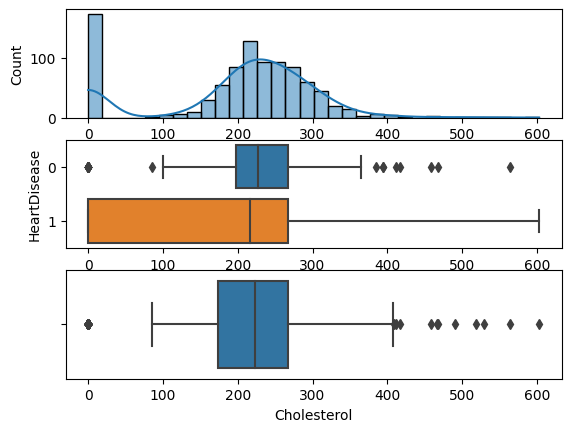

In [29]:
fig, axes = plt.subplots(3, 1)

sns.histplot(data=data, x="Cholesterol", kde=True, ax=axes[0])
sns.boxplot(x="Cholesterol", y="HeartDisease", data=data, ax=axes[1])
sns.boxplot(x="Cholesterol", data=data, ax=axes[2])
plt.plot()

Se evidencia que la variable _Cholesterol_ tiene un gran porcentaje de datos cercanos a cero y algunos atípicos cercanos a 600, pero la concentración de datos se encuentra entre los valores de 100 y 400.

Se genera el histograma para la variable _MaxHR_.

[]

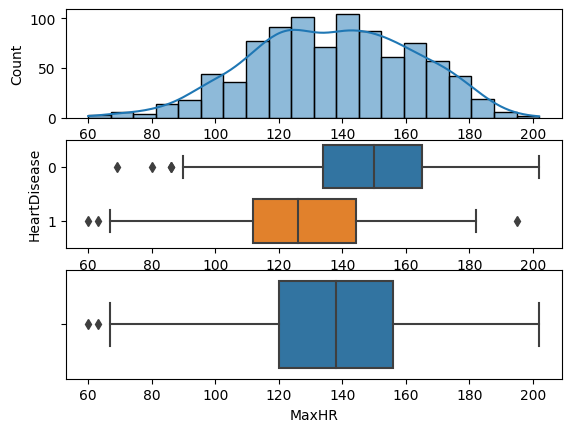

In [30]:
fig, axes = plt.subplots(3, 1)

sns.histplot(data=data, x="MaxHR", kde=True, ax=axes[0])
sns.boxplot(x="MaxHR", y="HeartDisease", data=data, ax=axes[1])
sns.boxplot(x="MaxHR", data=data, ax=axes[2])
plt.plot()

Se genera el histograma para la variable _Oldpeak_.

[]

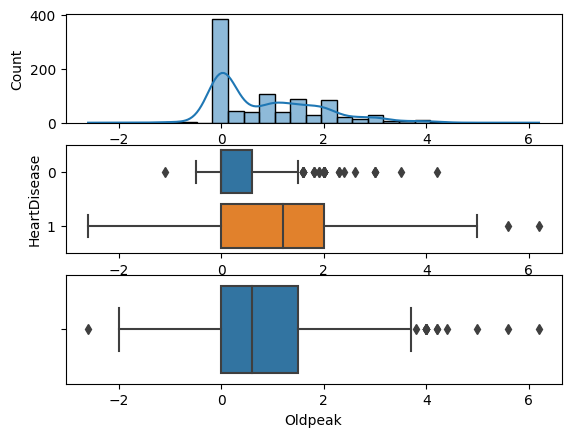

In [31]:
fig, axes = plt.subplots(3, 1)

sns.histplot(data=data, x="Oldpeak", kde=True, ax=axes[0])
sns.boxplot(x="Oldpeak", y="HeartDisease", data=data, ax=axes[1])
sns.boxplot(x="Oldpeak", data=data, ax=axes[2])
plt.plot()

* Para el caso de la variable Age vemos que los casos que presentan HeartDisease se da en en un menor rango como era de esperarse, pero contrario a lo que se podía intuir que las personas mayores tenían mayor posibilidades de sufrir un ataque pero de acuerdo a la gráfica boxplot notamos que no es el caso.

* Para el caso de la variable Cholesterol, vemos que según el gráfico de boxplot, para los casos en los que hay enfermedad cardiaca, la mayoría de los casos se presentan en las personas con un colesterol muy por debajo que la media, algo que puede ser contrario a lo que indicaría tener un colesterol bajo, por lo que se puede concluir para esta variable no podría representar valor significativo para el cálculo de los casos positivos.

* Para la variable MaxHR, notamos que no precisamente los que presentan una mayor frecuencia cardiaca son los que presentan la enfermedad cardiaca, pero si vemos que la proporción mayoritaria se encuentra entre 120 y 140, mientras que las personas que no presentaron problemas cardiacos se encuentran en mayor proporción con una frecuencia encima de los 150.

## Variables categóricas

In [ ]:
cat_cols = list(data.select_dtypes('category').columns)

In [ ]:
# A continuación se muestra un listado de las variables categóricas 
# y un conteo de sus valores y frecuencias
data.loc[:, data.columns.isin(cat_cols)].describe().T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
FastingBS,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460
HeartDisease,918,2,1,508


In [ ]:
cat_cols

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [ ]:
# Observamos qué valores únicos presentan las variables
for col in data:
    if col in cat_cols:
        print(f"{col} = {data[col].unique()}")

Sex = ['M', 'F']
Categories (2, object): ['M', 'F']
ChestPainType = ['ATA', 'NAP', 'ASY', 'TA']
Categories (4, object): ['ATA', 'NAP', 'ASY', 'TA']
FastingBS = [0, 1]
Categories (2, int64): [0, 1]
RestingECG = ['Normal', 'ST', 'LVH']
Categories (3, object): ['Normal', 'ST', 'LVH']
ExerciseAngina = ['N', 'Y']
Categories (2, object): ['N', 'Y']
ST_Slope = ['Up', 'Flat', 'Down']
Categories (3, object): ['Up', 'Flat', 'Down']
HeartDisease = [0, 1]
Categories (2, int64): [0, 1]


<AxesSubplot:xlabel='Sex', ylabel='Count'>

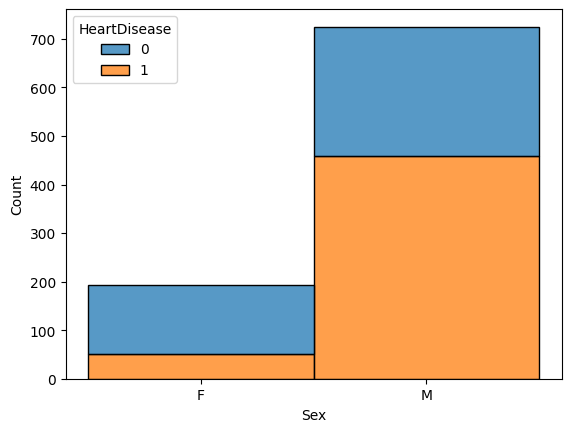

In [ ]:
sns.histplot(data=data, x="Sex", hue="HeartDisease", multiple="stack")

<AxesSubplot:xlabel='ChestPainType', ylabel='Count'>

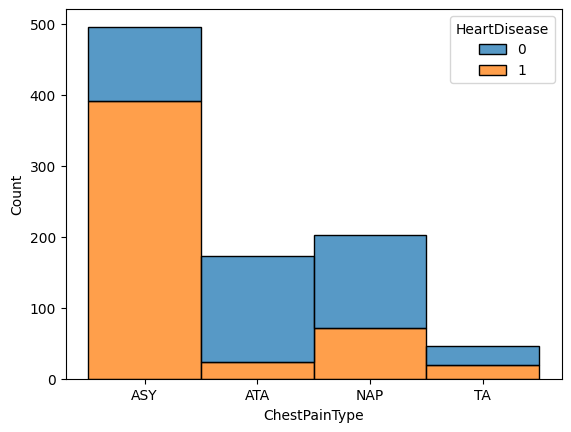

In [ ]:
sns.histplot(data=data, x="ChestPainType", hue="HeartDisease", multiple="stack")

<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

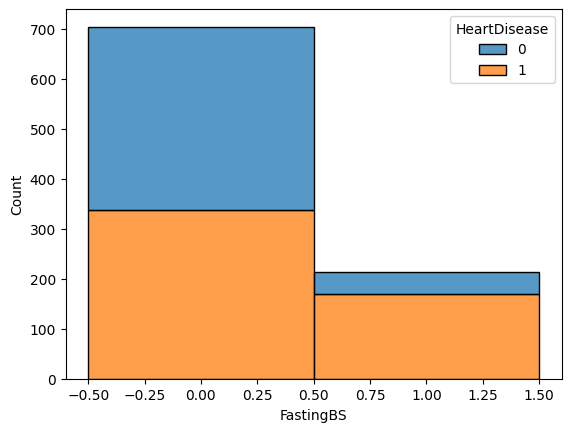

In [ ]:
sns.histplot(data=data, x="FastingBS", hue="HeartDisease", multiple="stack")

<AxesSubplot:xlabel='RestingECG', ylabel='Count'>

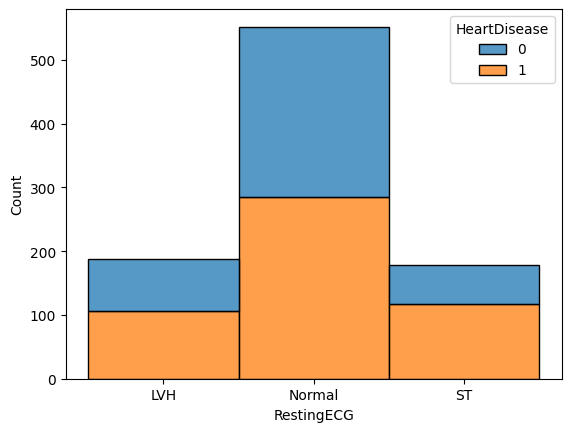

In [ ]:
sns.histplot(data=data, x="RestingECG", hue="HeartDisease", multiple="stack")

<AxesSubplot:xlabel='ExerciseAngina', ylabel='Count'>

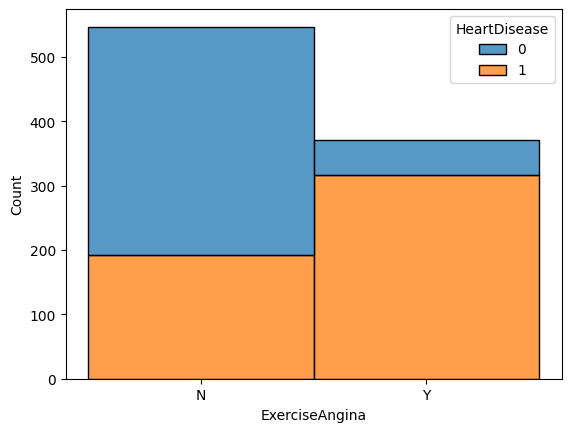

In [ ]:
sns.histplot(data=data, x="ExerciseAngina", hue="HeartDisease", multiple="stack")

<AxesSubplot:xlabel='ST_Slope', ylabel='Count'>

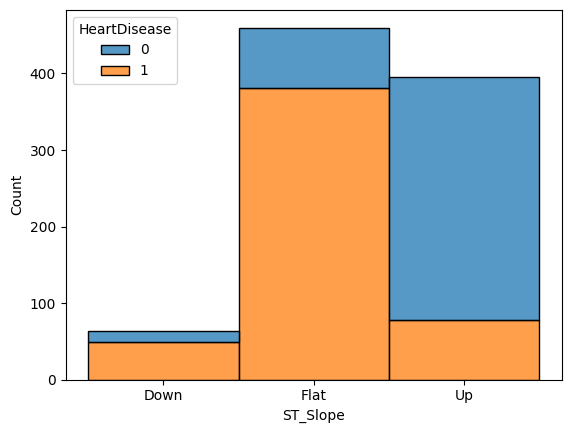

In [ ]:
sns.histplot(data=data, x="ST_Slope", hue="HeartDisease", multiple="stack")

TODO: Hacer un breve analisis de las variables categoricas

# Análisis bivariable

## Numéricas vs Numéricas

In [ ]:
# Matriz de correlación
#Se Puede Detallar que No Existe Una Fuerte Correlación lineal Entre Las Características 
data.corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.00,0.25,-0.10,-0.38,0.26
RestingBP,0.25,1.00,0.10,-0.11,0.16
Cholesterol,-0.10,0.10,1.00,0.24,0.05
MaxHR,-0.38,-0.11,0.24,1.00,-0.16
Oldpeak,0.26,0.16,0.05,-0.16,1.00


<AxesSubplot:>

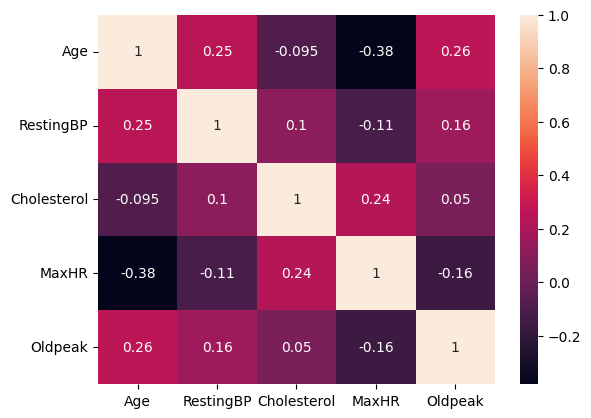

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
# Guardar variables numéricas
num_cols = []

for col in data.columns:
    if col not in cat_cols:
        num_cols.append(col)

In [ ]:
# Se obtiene el resultado del cálculo de normalized_mutual_info_score para
# complementar a la tradicional matriz de correlaciones, la cual solo se basa
# en relaciones lineales
# El valor de 1.0 representa una correlación perfecta
corr_results = []
for col in num_cols:
    for var in num_cols:
        if col != var:
            corr = (col, round(normalized_mutual_info_score(data[col],data[var]), 2), var)
            if corr[::-1] not in corr_results:
                corr_results.append(corr)
for result in corr_results:
    print(result)

('Age', 0.25, 'RestingBP')
('Age', 0.45, 'Cholesterol')
('Age', 0.36, 'MaxHR')
('Age', 0.2, 'Oldpeak')
('RestingBP', 0.42, 'Cholesterol')
('RestingBP', 0.34, 'MaxHR')
('RestingBP', 0.22, 'Oldpeak')
('Cholesterol', 0.55, 'MaxHR')
('Cholesterol', 0.33, 'Oldpeak')
('MaxHR', 0.31, 'Oldpeak')


Se observa que no existe una correlación alta (>=0.8 en ningun par de variables).

## Categóricas vs Objetivo (Categórica)

Declaración de clase para generar prueba chi cuadrado para determinar la significancia de las variables categóricas vs la variable objetivo, también categórica

In [ ]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

Se realiza la prueba para cada variable categórica y se encuentra que todas son importantes para predecir la variable objetivo

In [ ]:
cT = ChiSquare(data)
for var in cat_cols:
    if var != 'HeartDisease':
        cT.TestIndependence(colX=var,colY='HeartDisease')

Sex is IMPORTANT for Prediction
ChestPainType is IMPORTANT for Prediction
FastingBS is IMPORTANT for Prediction
RestingECG is IMPORTANT for Prediction
ExerciseAngina is IMPORTANT for Prediction
ST_Slope is IMPORTANT for Prediction


## Numéricas vs Objetivo (Categórica)

Se validará si hay diferencias significativas entre los pacientes con distinto resultado en la variable objetivo de acuerdo a las variables numéricas.

H0 = La diferencia entre las medias de los grupos es 0 (No hay diferencia significativa entre los grupos)

H1 = La diferencia entre las medias de los grupos es diferente de 0 (Existe diferencia significativa entre los grupos)

In [ ]:
# Se aplica análisis ANOVA, el cual no es estricto con el cumplimiento de supuestos
# de normalidad en la distribución de los datos
def anova_test(df, feature, target):
  df_anova = df[[feature, target]]
  grps = pd.unique(df[target].values)
  d_data = {grp:df_anova[feature][df_anova[target] == grp].to_numpy() for grp in grps}
  result = ""
  test_grps = [d_data[grp] for grp in grps]
  F, p = stats.f_oneway(*test_grps)
  print("p-value for significance is: ", p)
  if p < 0.05:
      print("reject null hypothesis")
      result="{0} groups' are different".format(feature)
      print(result)
  else:
      print("accept null hypothesis")
      result="{0} groups' are not different".format(feature)
      print(result)
  print('-'*50)

In [ ]:
num_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [ ]:
# Se realiza la prueba para cada variable numérica y se encuentra que
# dentro de cada una existe evidencia para afirmar que hay diferencias entre
# los grupos de pacientes con y sin enfermedad cardiaca
# Se rechaza entonces la hipótesis nula
for var in num_cols:
    anova_test(data, var, 'HeartDisease')

p-value for significance is:  3.0079532400488172e-18
reject null hypothesis
Age groups' are different
--------------------------------------------------
p-value for significance is:  0.0010953145851720501
reject null hypothesis
RestingBP groups' are different
--------------------------------------------------
p-value for significance is:  9.308308883529952e-13
reject null hypothesis
Cholesterol groups' are different
--------------------------------------------------
p-value for significance is:  1.1377859840275695e-36
reject null hypothesis
MaxHR groups' are different
--------------------------------------------------
p-value for significance is:  2.390772424058291e-37
reject null hypothesis
Oldpeak groups' are different
--------------------------------------------------


## Dependencia de la variable objetivo (categórica) vs las variables numéricas

Se obtiene una medida de la posible dependencia de la variable objetivo vs las variables numéricas, es decir qué tanta información aporta cada una de éstas al momento de explicar la variable objetivo. Esta medida tiene en cuenta relaciones lineales y no lineales que puedan existir. Valores iguales a cero indican independencia entre un par de variables.

In [ ]:
# Dejamos solo las variables numéricas y la objetivo por separado
X_num = data[num_cols]
y_mut = data['HeartDisease']

In [ ]:
# Hacemos el cálculo de mutual information
mutual_info = mutual_info_classif(X_num, y_mut)
mutual_info

array([0.02617879, 0.03110923, 0.08509627, 0.08062629, 0.10723812])

In [ ]:
# Observamos el listado de las variables de mayor a menor de acuerdo al cálculo
# y se obtiene entonces un ranking de mayor a menor de acuerdo a la medida de la
# información aportada (o dependencia) por cada variable numérica al momento de explicar la
# variable objetivo
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_num.columns
mutual_info.sort_values(ascending=False)

Oldpeak       0.11
Cholesterol   0.09
MaxHR         0.08
RestingBP     0.03
Age           0.03
dtype: float64

De lo anterior se observa que la variable objetivo no es independiente de ninguna de las variables numéricas, es decir, todas aportan información, en mayor o menor medida (o son más dependientes con la objetivo), de acuerdo al listado.

# Detección y procesamiento de datos atípicos

## Identificación de datos atípicos

Se genera un modelo de tipo Isolation Forest para aislar registros en el datset que tengan datos anómalos en alguna de sus columnas numéricas. Se asume que hay un 1% de registros con anomalías, esto para no perder demasiada información.

In [ ]:
# Se genera el modelo de detección de anomalías
modelo_isof = IsolationForest(
                n_estimators= 100,
                max_samples='auto',
                contamination=0.01,
                n_jobs= -1,
                random_state=123,
            )

In [ ]:
# La detección de atípicos solo aplica para datos numéricos
data_nums = data[num_cols]
data_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          918 non-null    int64  
 1   RestingBP    918 non-null    int64  
 2   Cholesterol  918 non-null    int64  
 3   MaxHR        918 non-null    int64  
 4   Oldpeak      918 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 36.0 KB


In [ ]:
# Se entrena el modelo y se detectan las anomalias (1%)
modelo_isof.fit(data_nums)
data_nums['anomaly_score'] = modelo_isof.predict(data_nums)

In [ ]:
# Se muestran los registros que presentan anomalías
data_nums[data_nums['anomaly_score']==-1]

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,anomaly_score
68,52,160,246,82,4.00,-1
227,38,92,117,134,2.50,-1
322,38,105,0,166,2.80,-1
324,46,100,0,133,-2.60,-1
332,38,100,0,179,-1.10,-1
399,61,200,0,70,0.00,-1
496,58,132,458,69,1.00,-1
541,76,104,113,120,3.50,-1
616,67,115,564,160,1.60,-1
732,56,200,288,133,4.00,-1


In [ ]:
# Vamos a eliminar los outliers en las columnas numéricas de los registros en los que
# se detectó alguna anomalía, para ello definimos la siguiente función
# que identifica los valores atípicos de acuerdo a la regla del rango intercuartílico
def remove_outlier(col):
  sorted(col)
  Q1, Q3 = col.quantile([.25, .75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

In [ ]:
# Se convierten en nulos los valores atípicos identificados
for var in num_cols:
    lower_val, upper_val = remove_outlier(data[var])
    data_nums[var] = np.where((data_nums['anomaly_score']==-1) & (data_nums[var]>upper_val),np.nan,data_nums[var])
    data_nums[var] = np.where((data_nums['anomaly_score']==-1) & (data_nums[var]<lower_val),np.nan,data_nums[var])

In [ ]:
data_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            918 non-null    float64
 1   RestingBP      916 non-null    float64
 2   Cholesterol    912 non-null    float64
 3   MaxHR          918 non-null    float64
 4   Oldpeak        915 non-null    float64
 5   anomaly_score  918 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 43.2 KB


In [ ]:
# Organizamos el dataset nuevamente
data.drop(columns=num_cols, inplace=True)
data = pd.concat([data_nums[num_cols], data], axis=1)
data

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,40.00,140.00,289.00,172.00,0.00,M,ATA,0,Normal,N,Up,0
1,49.00,160.00,180.00,156.00,1.00,F,NAP,0,Normal,N,Flat,1
2,37.00,130.00,283.00,98.00,0.00,M,ATA,0,ST,N,Up,0
3,48.00,138.00,214.00,108.00,1.50,F,ASY,0,Normal,Y,Flat,1
4,54.00,150.00,195.00,122.00,0.00,M,NAP,0,Normal,N,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.00,110.00,264.00,132.00,1.20,M,TA,0,Normal,N,Flat,1
914,68.00,144.00,193.00,141.00,3.40,M,ASY,1,Normal,N,Flat,1
915,57.00,130.00,131.00,115.00,1.20,M,ASY,0,Normal,Y,Flat,1
916,57.00,130.00,236.00,174.00,0.00,F,ATA,0,LVH,N,Flat,1


In [ ]:
# Dataset con nulos generados luego de volver nulos los datos atípicos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    float64 
 1   RestingBP       916 non-null    float64 
 2   Cholesterol     912 non-null    float64 
 3   MaxHR           918 non-null    float64 
 4   Oldpeak         915 non-null    float64 
 5   Sex             918 non-null    category
 6   ChestPainType   918 non-null    category
 7   FastingBS       918 non-null    category
 8   RestingECG      918 non-null    category
 9   ExerciseAngina  918 non-null    category
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(5)
memory usage: 43.2 KB


## Procesamiento de datos nulos generados

Para hacer la imputación de los valores nulos generados en el paso anterior, se hará uso del método de imputación por vecinos más cercanos.

In [ ]:
# Guardamos las variables categóricas orginales a parte
data_cats = data[cat_cols]

In [ ]:
# Se hace un escalamiento de los datos ya que el KNNImputer trabaja a través de distancias
# por ende las variables deben estar en la misma escala
imput_scaler = MinMaxScaler()
data[num_cols] = imput_scaler.fit_transform(data[num_cols])

In [ ]:
# Se corrige el tipo de datos para estas variables para la imputación
# ya que se requiere que todas las variables esten en su representación numérica
data['FastingBS'] = data['FastingBS'].astype('int')
data['HeartDisease'] = data['HeartDisease'].astype('int')

In [ ]:
# Se convierte en binaria estas variables
data['Sex'] = np.where(
    data['Sex']=='F',
    1,
    0
)

data['ExerciseAngina'] = np.where(
    data['ExerciseAngina']=='Y',
    1,
    0
)

In [ ]:
# Codificación de las variables categóricas a numéricas convirtiendolas en dummies (+2 categorías)
cat_cols_dummy = ['ChestPainType', 'RestingECG', 'ST_Slope']
for col in cat_cols_dummy:
  data = pd.concat([data.drop(col, axis=1), pd.get_dummies(data[col], prefix=col, drop_first=True)], axis=1)

In [ ]:
data.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,FastingBS,ExerciseAngina,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,0.24,0.70,0.48,0.79,0.24,0,0,0,0,1,0,0,1,0,0,1
1,0.43,0.80,0.30,0.68,0.37,1,0,0,1,0,1,0,1,0,1,0
2,0.18,0.65,0.47,0.27,0.24,0,0,0,0,1,0,0,0,1,0,1
3,0.41,0.69,0.35,0.34,0.43,1,0,1,1,0,0,0,1,0,1,0
4,0.53,0.75,0.32,0.44,0.24,0,0,0,0,0,1,0,1,0,0,1


In [ ]:
# Se creea el imputer y se genera la imputación de nulos
imputer = KNNImputer(n_neighbors=5)
data_filled = imputer.fit_transform(data)

In [ ]:
# Dataset imputado
data = pd.DataFrame(data_filled, columns=data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    float64
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   MaxHR              918 non-null    float64
 4   Oldpeak            918 non-null    float64
 5   Sex                918 non-null    float64
 6   FastingBS          918 non-null    float64
 7   ExerciseAngina     918 non-null    float64
 8   HeartDisease       918 non-null    float64
 9   ChestPainType_ATA  918 non-null    float64
 10  ChestPainType_NAP  918 non-null    float64
 11  ChestPainType_TA   918 non-null    float64
 12  RestingECG_Normal  918 non-null    float64
 13  RestingECG_ST      918 non-null    float64
 14  ST_Slope_Flat      918 non-null    float64
 15  ST_Slope_Up        918 non-null    float64
dtypes: float64(16)
memory usag

In [ ]:
# Nos quedamos solo con las variables numéricas y se revierte el escalamiento generado para la imputación
data = data[num_cols]
data = imput_scaler.inverse_transform(data)
data = pd.DataFrame(data, columns=num_cols)
data.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40.00,140.00,289.00,172.00,0.00
1,49.00,160.00,180.00,156.00,1.00
2,37.00,130.00,283.00,98.00,0.00
3,48.00,138.00,214.00,108.00,1.50
4,54.00,150.00,195.00,122.00,0.00


In [ ]:
# Organizamos nuevamente el dataset uniendo las variables numéricas y las categóricas originales
data = pd.concat([data, data_cats], axis=1)
data

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,40.00,140.00,289.00,172.00,0.00,M,ATA,0,Normal,N,Up,0
1,49.00,160.00,180.00,156.00,1.00,F,NAP,0,Normal,N,Flat,1
2,37.00,130.00,283.00,98.00,0.00,M,ATA,0,ST,N,Up,0
3,48.00,138.00,214.00,108.00,1.50,F,ASY,0,Normal,Y,Flat,1
4,54.00,150.00,195.00,122.00,0.00,M,NAP,0,Normal,N,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.00,110.00,264.00,132.00,1.20,M,TA,0,Normal,N,Flat,1
914,68.00,144.00,193.00,141.00,3.40,M,ASY,1,Normal,N,Flat,1
915,57.00,130.00,131.00,115.00,1.20,M,ASY,0,Normal,Y,Flat,1
916,57.00,130.00,236.00,174.00,0.00,F,ATA,0,LVH,N,Flat,1


In [ ]:
# Dataset original con imputación de nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    float64 
 1   RestingBP       918 non-null    float64 
 2   Cholesterol     918 non-null    float64 
 3   MaxHR           918 non-null    float64 
 4   Oldpeak         918 non-null    float64 
 5   Sex             918 non-null    category
 6   ChestPainType   918 non-null    category
 7   FastingBS       918 non-null    category
 8   RestingECG      918 non-null    category
 9   ExerciseAngina  918 non-null    category
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(5)
memory usage: 43.2 KB


# Feature Engineering

In [ ]:
# Se convierte a numérica la variable objetivo (binaria)
data['HeartDisease'] = data['HeartDisease'].astype('int')

## División de los datos

In [ ]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [ ]:
# Division 70-30 de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123, stratify=y)

## Escalamiento de los datos de entrenamiento

In [ ]:
scaler_train = MinMaxScaler()

In [ ]:
X_train[num_cols] = scaler_train.fit_transform(X_train[num_cols])

In [ ]:
X_train

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,0.24,0.50,0.48,0.79,0.24,M,ATA,0,Normal,N,Up
462,0.63,0.35,0.39,0.40,0.40,M,ASY,0,Normal,Y,Down
853,0.39,0.48,0.43,0.68,0.24,M,NAP,0,LVH,N,Up
540,0.69,0.48,0.34,0.44,0.39,M,NAP,0,ST,Y,Flat
162,0.39,0.67,0.44,0.80,0.24,M,ATA,0,Normal,N,Up
...,...,...,...,...,...,...,...,...,...,...,...
367,0.82,0.46,0.00,0.42,0.24,M,ASY,0,ST,Y,Up
177,0.63,0.50,0.48,0.63,0.24,M,ATA,0,Normal,N,Up
192,0.41,0.42,0.41,0.70,0.24,M,ATA,0,Normal,N,Up
239,0.41,0.67,0.32,0.30,0.61,M,ASY,0,Normal,Y,Flat


## Balanceo de los datos de entrenamiento

Debido al desbalance de los datos en el conjunto de entrenamiento, siendo de 350 positivos y 290 de negativo se realiza la técnica de  SMOTE para poder hacer un balanceo de las clases

<AxesSubplot:>

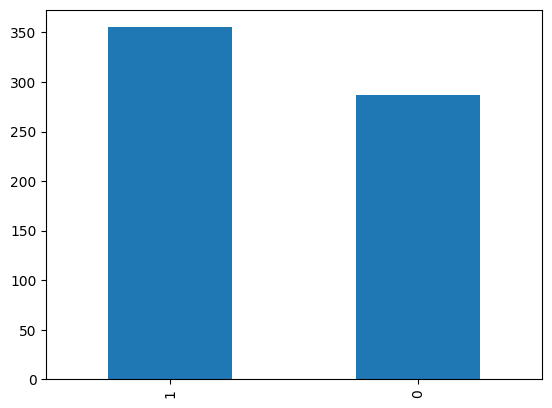

In [ ]:
# Se observa que hay un poco de desbalanceo
y_train.value_counts().plot(kind='bar')

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 0 to 861
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             642 non-null    float64 
 1   RestingBP       642 non-null    float64 
 2   Cholesterol     642 non-null    float64 
 3   MaxHR           642 non-null    float64 
 4   Oldpeak         642 non-null    float64 
 5   Sex             642 non-null    category
 6   ChestPainType   642 non-null    category
 7   FastingBS       642 non-null    category
 8   RestingECG      642 non-null    category
 9   ExerciseAngina  642 non-null    category
 10  ST_Slope        642 non-null    category
dtypes: category(6), float64(5)
memory usage: 34.7 KB


In [ ]:
# Se utiliza una variante de SMOTE que permite trabajar con variables categóricas
smote_nc = SMOTENC(categorical_features=[5,6,7,8,9,10], random_state=27, n_jobs=-1)
X_train, y_train = smote_nc.fit_resample(X_train, y_train)

In [ ]:
# Datos de entrenamiento balanceados
X_train

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,0.24,0.50,0.48,0.79,0.24,M,ATA,0,Normal,N,Up
1,0.63,0.35,0.39,0.40,0.40,M,ASY,0,Normal,Y,Down
2,0.39,0.48,0.43,0.68,0.24,M,NAP,0,LVH,N,Up
3,0.69,0.48,0.34,0.44,0.39,M,NAP,0,ST,Y,Flat
4,0.39,0.67,0.44,0.80,0.24,M,ATA,0,Normal,N,Up
...,...,...,...,...,...,...,...,...,...,...,...
705,0.66,0.58,0.40,0.77,0.35,F,ATA,0,Normal,N,Up
706,0.40,0.48,0.46,0.58,0.41,F,ATA,0,Normal,N,Up
707,0.69,0.45,0.34,0.47,0.29,M,ASY,0,ST,N,Up
708,0.45,0.37,0.40,0.28,0.24,F,ATA,0,Normal,N,Up


<AxesSubplot:>

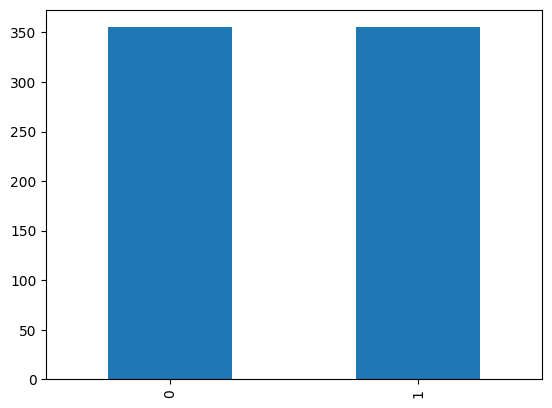

In [ ]:
y_train.value_counts().plot(kind='bar')

## Conversión de variables categóricas a numéricas en el dataset de entrenamiento

In [ ]:
# Se convierte a numérica ésta variable (binaria)
X_train['FastingBS'] = X_train['FastingBS'].astype('int')

In [ ]:
# Se convierten en binarias estas variables
X_train['Sex'] = np.where(
    X_train['Sex']=='F',
    1,
    0
)

X_train['ExerciseAngina'] = np.where(
    X_train['ExerciseAngina']=='Y',
    1,
    0
)

In [ ]:
X_train

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,0.24,0.50,0.48,0.79,0.24,0,ATA,0,Normal,0,Up
1,0.63,0.35,0.39,0.40,0.40,0,ASY,0,Normal,1,Down
2,0.39,0.48,0.43,0.68,0.24,0,NAP,0,LVH,0,Up
3,0.69,0.48,0.34,0.44,0.39,0,NAP,0,ST,1,Flat
4,0.39,0.67,0.44,0.80,0.24,0,ATA,0,Normal,0,Up
...,...,...,...,...,...,...,...,...,...,...,...
705,0.66,0.58,0.40,0.77,0.35,1,ATA,0,Normal,0,Up
706,0.40,0.48,0.46,0.58,0.41,1,ATA,0,Normal,0,Up
707,0.69,0.45,0.34,0.47,0.29,0,ASY,0,ST,0,Up
708,0.45,0.37,0.40,0.28,0.24,1,ATA,0,Normal,0,Up


In [ ]:
# Codificación de las variables categóricas a numéricas convirtiendolas en dummies (+2 categorías)
cat_cols_dummy = ['ChestPainType', 'RestingECG', 'ST_Slope']
for col in cat_cols_dummy:
  X_train = pd.concat([X_train.drop(col, axis=1), pd.get_dummies(X_train[col], prefix=col, drop_first=True)], axis=1)

In [ ]:
X_train

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,FastingBS,ExerciseAngina,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,0.24,0.50,0.48,0.79,0.24,0,0,0,1,0,0,1,0,0,1
1,0.63,0.35,0.39,0.40,0.40,0,0,1,0,0,0,1,0,0,0
2,0.39,0.48,0.43,0.68,0.24,0,0,0,0,1,0,0,0,0,1
3,0.69,0.48,0.34,0.44,0.39,0,0,1,0,1,0,0,1,1,0
4,0.39,0.67,0.44,0.80,0.24,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,0.66,0.58,0.40,0.77,0.35,1,0,0,1,0,0,1,0,0,1
706,0.40,0.48,0.46,0.58,0.41,1,0,0,1,0,0,1,0,0,1
707,0.69,0.45,0.34,0.47,0.29,0,0,0,0,0,0,0,1,0,1
708,0.45,0.37,0.40,0.28,0.24,1,0,0,1,0,0,1,0,0,1


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                710 non-null    float64
 1   RestingBP          710 non-null    float64
 2   Cholesterol        710 non-null    float64
 3   MaxHR              710 non-null    float64
 4   Oldpeak            710 non-null    float64
 5   Sex                710 non-null    int64  
 6   FastingBS          710 non-null    int64  
 7   ExerciseAngina     710 non-null    int64  
 8   ChestPainType_ATA  710 non-null    uint8  
 9   ChestPainType_NAP  710 non-null    uint8  
 10  ChestPainType_TA   710 non-null    uint8  
 11  RestingECG_Normal  710 non-null    uint8  
 12  RestingECG_ST      710 non-null    uint8  
 13  ST_Slope_Flat      710 non-null    uint8  
 14  ST_Slope_Up        710 non-null    uint8  
dtypes: float64(5), int64(3), uint8(7)
memory usage: 49.4 KB


## Escalamiento de los datos de prueba

In [ ]:
# Se utiliza el escalador entrenado con los datos de entrenamiento
X_test[num_cols] = scaler_train.transform(X_test[num_cols])

In [ ]:
X_test

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
633,0.73,0.25,0.35,0.59,0.46,M,TA,0,LVH,Y,Flat
884,0.80,0.67,0.47,0.34,0.43,M,ASY,0,LVH,Y,Flat
60,0.43,0.17,0.42,0.80,0.24,M,ATA,0,Normal,N,Up
219,0.02,0.50,0.44,0.77,0.24,M,ATA,0,Normal,N,Up
143,0.51,0.50,0.40,0.67,0.24,M,ASY,0,Normal,N,Up
...,...,...,...,...,...,...,...,...,...,...,...
132,0.57,0.75,0.64,0.44,0.49,M,ASY,0,ST,Y,Flat
486,0.55,0.25,0.35,0.85,0.29,M,ATA,1,ST,N,Up
859,0.47,0.50,0.51,0.58,0.43,F,NAP,0,LVH,N,Up
334,0.47,0.42,0.00,0.77,0.16,M,ASY,1,Normal,N,Up


## Conversión de variables categóricas a numéricas en el dataset de prueba

In [ ]:
# Se convierte a numérica ésta variable (binaria)
X_test['FastingBS'] = X_test['FastingBS'].astype('int')

In [ ]:
# Se convierten en binarias estas variables
X_test['Sex'] = np.where(
    X_test['Sex']=='F',
    1,
    0
)

X_test['ExerciseAngina'] = np.where(
    X_test['ExerciseAngina']=='Y',
    1,
    0
)

In [ ]:
X_test

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
633,0.73,0.25,0.35,0.59,0.46,0,TA,0,LVH,1,Flat
884,0.80,0.67,0.47,0.34,0.43,0,ASY,0,LVH,1,Flat
60,0.43,0.17,0.42,0.80,0.24,0,ATA,0,Normal,0,Up
219,0.02,0.50,0.44,0.77,0.24,0,ATA,0,Normal,0,Up
143,0.51,0.50,0.40,0.67,0.24,0,ASY,0,Normal,0,Up
...,...,...,...,...,...,...,...,...,...,...,...
132,0.57,0.75,0.64,0.44,0.49,0,ASY,0,ST,1,Flat
486,0.55,0.25,0.35,0.85,0.29,0,ATA,1,ST,0,Up
859,0.47,0.50,0.51,0.58,0.43,1,NAP,0,LVH,0,Up
334,0.47,0.42,0.00,0.77,0.16,0,ASY,1,Normal,0,Up


In [ ]:
# Codificación de las variables categóricas a numéricas convirtiendolas en dummies (+2 categorías)
cat_cols_dummy = ['ChestPainType', 'RestingECG', 'ST_Slope']
for col in cat_cols_dummy:
  X_test = pd.concat([X_test.drop(col, axis=1), pd.get_dummies(X_test[col], prefix=col, drop_first=True)], axis=1)

In [ ]:
X_test

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,FastingBS,ExerciseAngina,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
633,0.73,0.25,0.35,0.59,0.46,0,0,1,0,0,1,0,0,1,0
884,0.80,0.67,0.47,0.34,0.43,0,0,1,0,0,0,0,0,1,0
60,0.43,0.17,0.42,0.80,0.24,0,0,0,1,0,0,1,0,0,1
219,0.02,0.50,0.44,0.77,0.24,0,0,0,1,0,0,1,0,0,1
143,0.51,0.50,0.40,0.67,0.24,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.57,0.75,0.64,0.44,0.49,0,0,1,0,0,0,0,1,1,0
486,0.55,0.25,0.35,0.85,0.29,0,1,0,1,0,0,0,1,0,1
859,0.47,0.50,0.51,0.58,0.43,1,0,0,0,1,0,0,0,0,1
334,0.47,0.42,0.00,0.77,0.16,0,1,0,0,0,0,1,0,0,1


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 633 to 333
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                276 non-null    float64
 1   RestingBP          276 non-null    float64
 2   Cholesterol        276 non-null    float64
 3   MaxHR              276 non-null    float64
 4   Oldpeak            276 non-null    float64
 5   Sex                276 non-null    int64  
 6   FastingBS          276 non-null    int64  
 7   ExerciseAngina     276 non-null    int64  
 8   ChestPainType_ATA  276 non-null    uint8  
 9   ChestPainType_NAP  276 non-null    uint8  
 10  ChestPainType_TA   276 non-null    uint8  
 11  RestingECG_Normal  276 non-null    uint8  
 12  RestingECG_ST      276 non-null    uint8  
 13  ST_Slope_Flat      276 non-null    uint8  
 14  ST_Slope_Up        276 non-null    uint8  
dtypes: float64(5), int64(3), uint8(7)
memory usage: 21.3 KB


# Modelamiento de datos (Machine Learning)

In [ ]:
# Métodos y métricas a utilizar
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Algoritmos seleccionados
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
# Validación cruzada con KFold Estratificado
seed = 2
models = []
#logistic Regression
models.append(('LR', LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced", max_iter=500)))
# Decision Tree classifier
models.append(('CART', DecisionTreeClassifier()))
# Naïve Bayes
models.append(('NB', GaussianNB()))
# Random Forest
models.append(('RF', RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)))
# KNN
models.append(('KNN', neighbors.KNeighborsClassifier(n_neighbors=5)))
# NN
models.append(('NN', MLPClassifier(activation='relu', hidden_layer_sizes=(5), 
                                   learning_rate='constant', learning_rate_init=0.01, 
                                   momentum=0.09, max_iter=500, verbose=False)))
# Linear SVM
models.append(('LSVM', SVC(kernel='linear')))
# Kernel SVM
models.append(('KSVM', SVC(kernel = 'rbf', random_state = 0)))
# XGB
models.append(('XGB', XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    objective='binary:logistic',
    eval_metric='logloss'
)))

# evaluate each model in turn
results = []
names = []
results_metrics = []

scoring = ['accuracy', 'recall', 'precision', 'f1']

print("Media del desempeño de los modelos en el conjunto de testeo")
print("#"*50)
for name, model in models:
    # Kfol cross validation for model selection
    kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    #X train , y train
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = {}
    msg = {
        'mean': {
                'accuracy': np.mean(cv_results['test_accuracy']),
                'precision': np.mean(cv_results['test_precision']),
                'recall': np.mean(cv_results['test_recall']),
                'f1': np.mean(cv_results['test_f1'])
        },
        'std': {
                'accuracy': np.std(cv_results['test_accuracy']),
                'precision': np.std(cv_results['test_precision']),
                'recall': np.std(cv_results['test_recall']),
                'f1': np.std(cv_results['test_f1'])
        }
    }
    results_metrics.append(msg)
    #msg = f"({name}, accuracy: {np.mean(cv_results['test_accuracy'])}, recall: {cv_results.std()}, precision: {}, f1: {}"
    print(name)
    print(pd.DataFrame(msg))
    print("#"*50)

Media del desempeño de los modelos en el conjunto de testeo
##################################################
LR
           mean  std
accuracy   0.87 0.05
precision  0.86 0.05
recall     0.88 0.05
f1         0.87 0.04
##################################################
CART
           mean  std
accuracy   0.78 0.05
precision  0.79 0.05
recall     0.77 0.06
f1         0.78 0.04
##################################################
NB
           mean  std
accuracy   0.87 0.04
precision  0.87 0.04
recall     0.88 0.06
f1         0.87 0.04
##################################################
RF
           mean  std
accuracy   0.88 0.05
precision  0.87 0.05
recall     0.89 0.06
f1         0.88 0.05
##################################################
KNN
           mean  std
accuracy   0.85 0.05
precision  0.84 0.06
recall     0.87 0.06
f1         0.86 0.04
##################################################
NN
           mean  std
accuracy   0.85 0.04
precision  0.84 0.05
recall     0.86 0.06
f1  

La métrica escogida para comparar el desempeño de los modelos es el Recall, ya que el costo de un falso negativo es mucho más alto que un falso positivo, es decir, es más costoso etiquetar a un paciente como que no presentará enfermedad cardiovascular y que en realidad si la tenga posteriormente a etiquetar a un paciente como que Si tendrá una enfermedad cardiovascular y que finalmente no la tenga. Lo anterior debido a que un falso positivo únicamente implica la realización de mayores exámenes, mientras que un falso negativo puede incurrir en la complicación de la salud de un paciente.

En la gráfica se observa que los árboles de decisión, tienen un desempeño bajo y una varianza alta, en el caso del mejor modelo, se observa que el Random Forest junto a la Máquina de Soporte Vectorial, tienen resultados similares.

Text(0.5, 1.0, 'Resultados de Cross Validation')

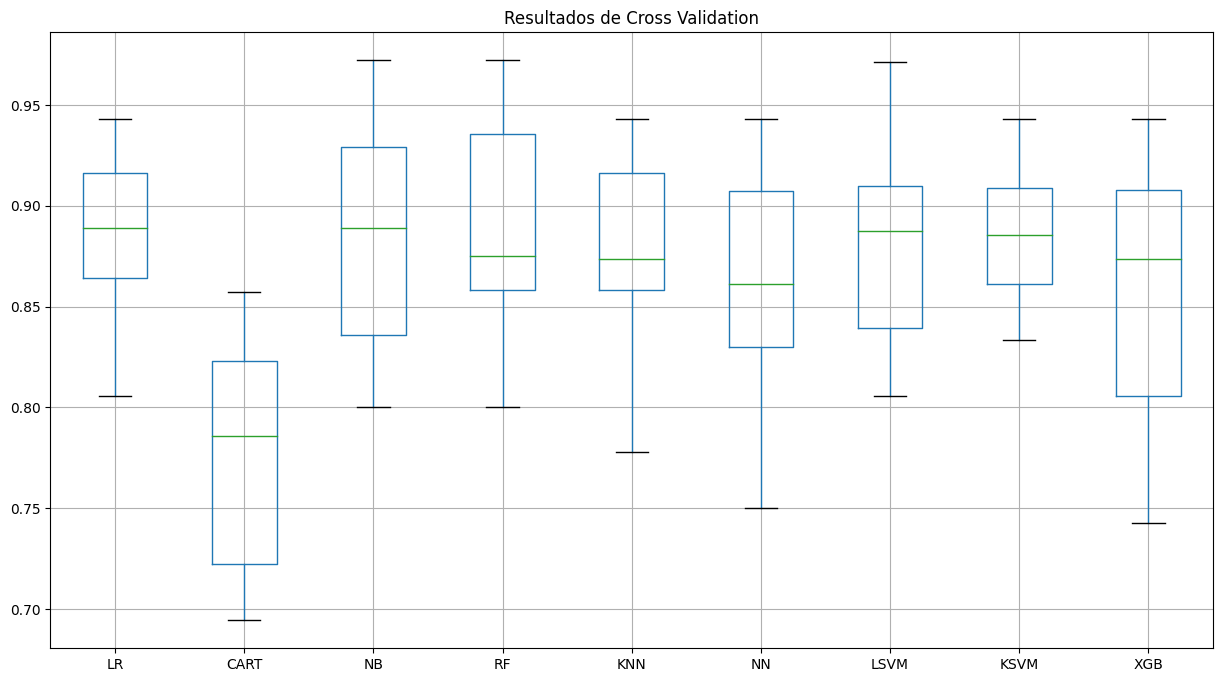

In [ ]:
# Desempeño de los modelos con validación cruzada en el conjunto de testeo de acuerdo al recall
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8)) 
result_df = pd.DataFrame([result['test_recall'] for result in results], index=names).T
result_df.boxplot()
plt.title("Resultados de Cross Validation")

In [ ]:
# Generar dataframe con resultado de las métricas
results_metrics_df = pd.DataFrame(
    data={
        'Model': names,
        'Accuracy': [result['mean']['accuracy'] for result in results_metrics],
        'Precision': [result['mean']['precision'] for result in results_metrics],
        'Recall': [result['mean']['recall'] for result in results_metrics],
        'F1': [result['mean']['f1'] for result in results_metrics]
    }
)
results_metrics_df

#Se escoge el KSVM

,Model,Accuracy,Precision,Recall,F1
0,LR,0.87,0.86,0.88,0.87
1,CART,0.78,0.79,0.77,0.78
2,NB,0.87,0.87,0.88,0.87
3,RF,0.88,0.87,0.89,0.88
4,KNN,0.85,0.84,0.87,0.86
5,NN,0.85,0.84,0.86,0.85
6,LSVM,0.86,0.85,0.88,0.87
7,KSVM,0.86,0.84,0.89,0.86
8,XGB,0.85,0.86,0.85,0.86


## Optimización de hiperparámetros del modelo seleccionado

Se buscarán los mejores parámetros para los dos mejores modelos seleccionados.

In [ ]:
# Se hará la búsqueda de los mejores parámetros para el modelo Random Forest
parameters = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 8],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(
    RandomForestClassifier(), 
    parameters, 
    cv=10,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [ ]:
grid_search.best_score_

0.9126190476190477

In [ ]:
# Se guarda un objeto con el mejor modelo encontrado de Random Forest
best_model_rf = grid_search.best_estimator_

In [ ]:
best_model_rf.feature_importances_

array([0.04987981, 0.04233352, 0.08877892, 0.07538718, 0.12213763,
       0.03975094, 0.02945175, 0.09036555, 0.05023494, 0.03639417,
       0.00228932, 0.00863642, 0.00742936, 0.16736138, 0.18956912])

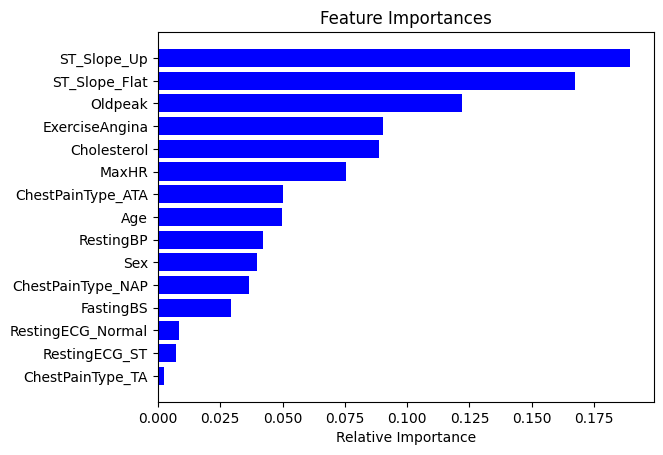

In [ ]:
# Gráfica de importancia de las variables para el modelo Random Forest
features = X_train.columns
importances = best_model_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Se hará la búsqueda de los mejores parámetros para el modelo de SVC
parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'C': [0.5, 1.0, 2.0]
}

grid_search = GridSearchCV(
    SVC(), 
    parameters, 
    cv=10,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


{'C': 2.0, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
grid_search.best_score_

0.904047619047619

In [ ]:
# Se guarda un objeto con el mejor modelo encontrado de SVC
best_model_svm = grid_search.best_estimator_

## Evaluación final del modelo seleccionado

Tomar los parametros obtenidos en el paso anterior, se crea el modelo con esos pararmetros y se entrena el modelo con todos los datos del **Train - Set**

Finalmente se realiza la evaluacion (segun su problema si es de regresion o de clasificacion) usando el **Test - Set** para definir si el modelo obtenido esta bien.

In [ ]:
# Se entrena el mejor modelo RF con los parámetros encontrados con todos los datos de entrenamiento
best_model_rf.fit(X_train,y_train)
y_pred = best_model_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       123
           1       0.86      0.90      0.88       153

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



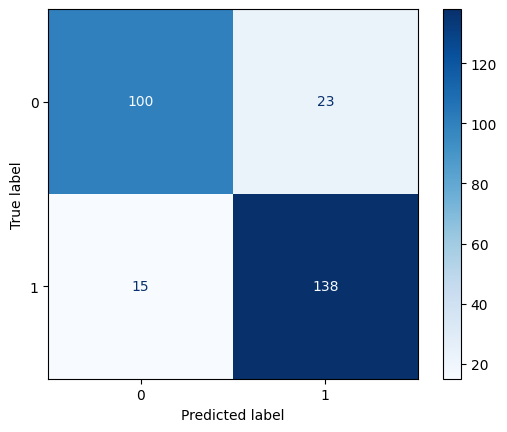

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Recall
recall_score(y_test, y_pred)

0.9019607843137255

In [ ]:
# Se entrena el mejor modelo SVC con los parámetros encontrados con todos los datos de entrenamiento
best_model_svm.fit(X_train,y_train)
y_pred = best_model_svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       123
           1       0.88      0.90      0.89       153

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



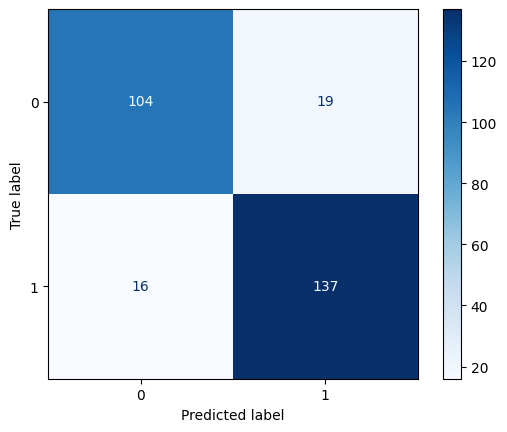

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='d', cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Recall
recall_score(y_test, y_pred)

0.8954248366013072

# Comunicación de resultados

A continuación validaremos la importancia de las variables al momento de realizar la predicción.

In [ ]:
imps = permutation_importance(best_model_rf, X_test, y_test, n_repeats = 5,scoring='recall', n_jobs=-1, random_state=42)

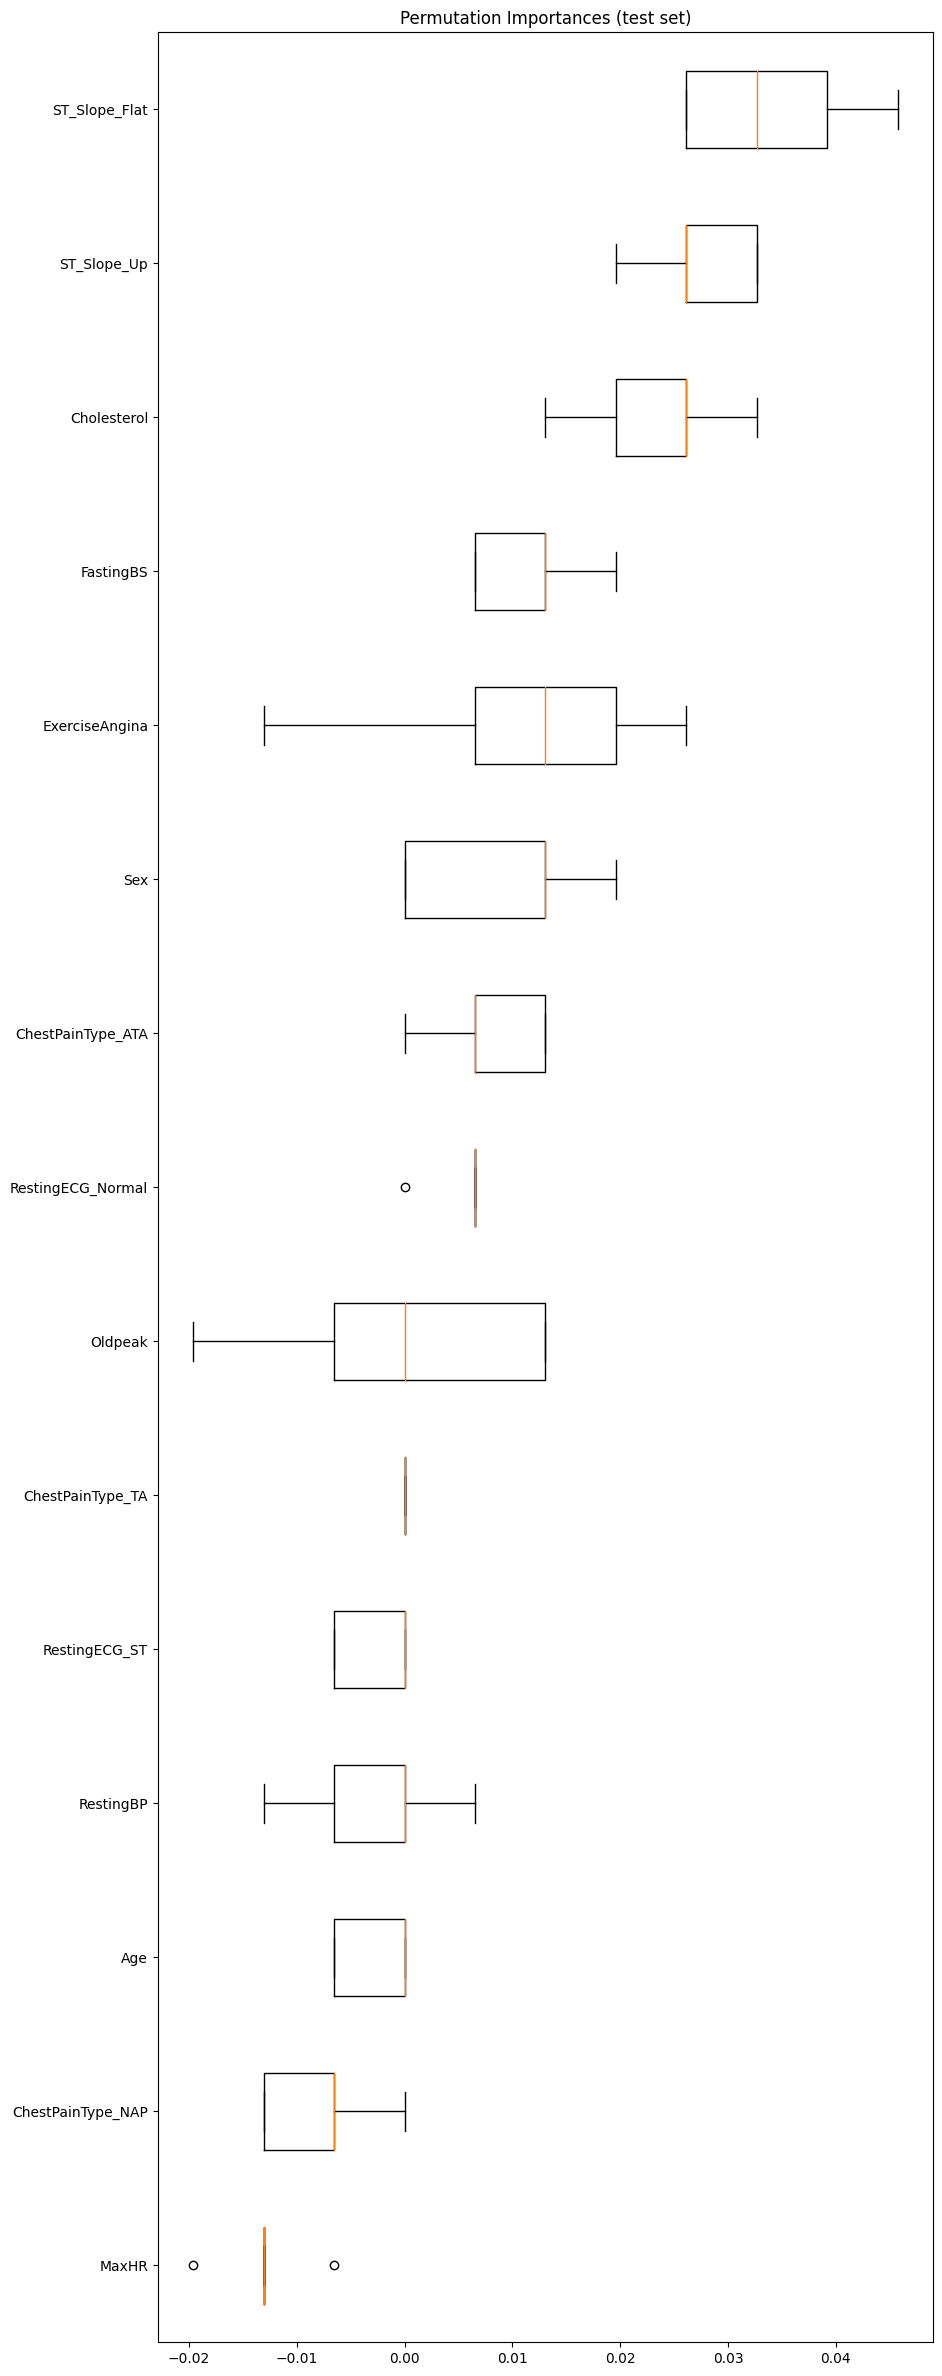

In [ ]:
fig= plt.figure(figsize=(10,30))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False,
            labels=X_test.columns[perm_sorted_idx])
plt.title("Permutation Importances (test set)");

In [ ]:
vari = list(X_test.columns[perm_sorted_idx][-5:])

In [ ]:
print('The change in these variables results in a drop of the recall - sensitivity, so this variables are important for the results ')
for x in vari:
  print(x)

The change in these variables results in a drop of the recall - sensitivity, so this variables are important for the results 
ExerciseAngina
FastingBS
Cholesterol
ST_Slope_Up
ST_Slope_Flat


In [ ]:
imps = permutation_importance(best_model_svm, X_test, y_test, n_repeats = 5,scoring='recall', n_jobs=-1, random_state=42)

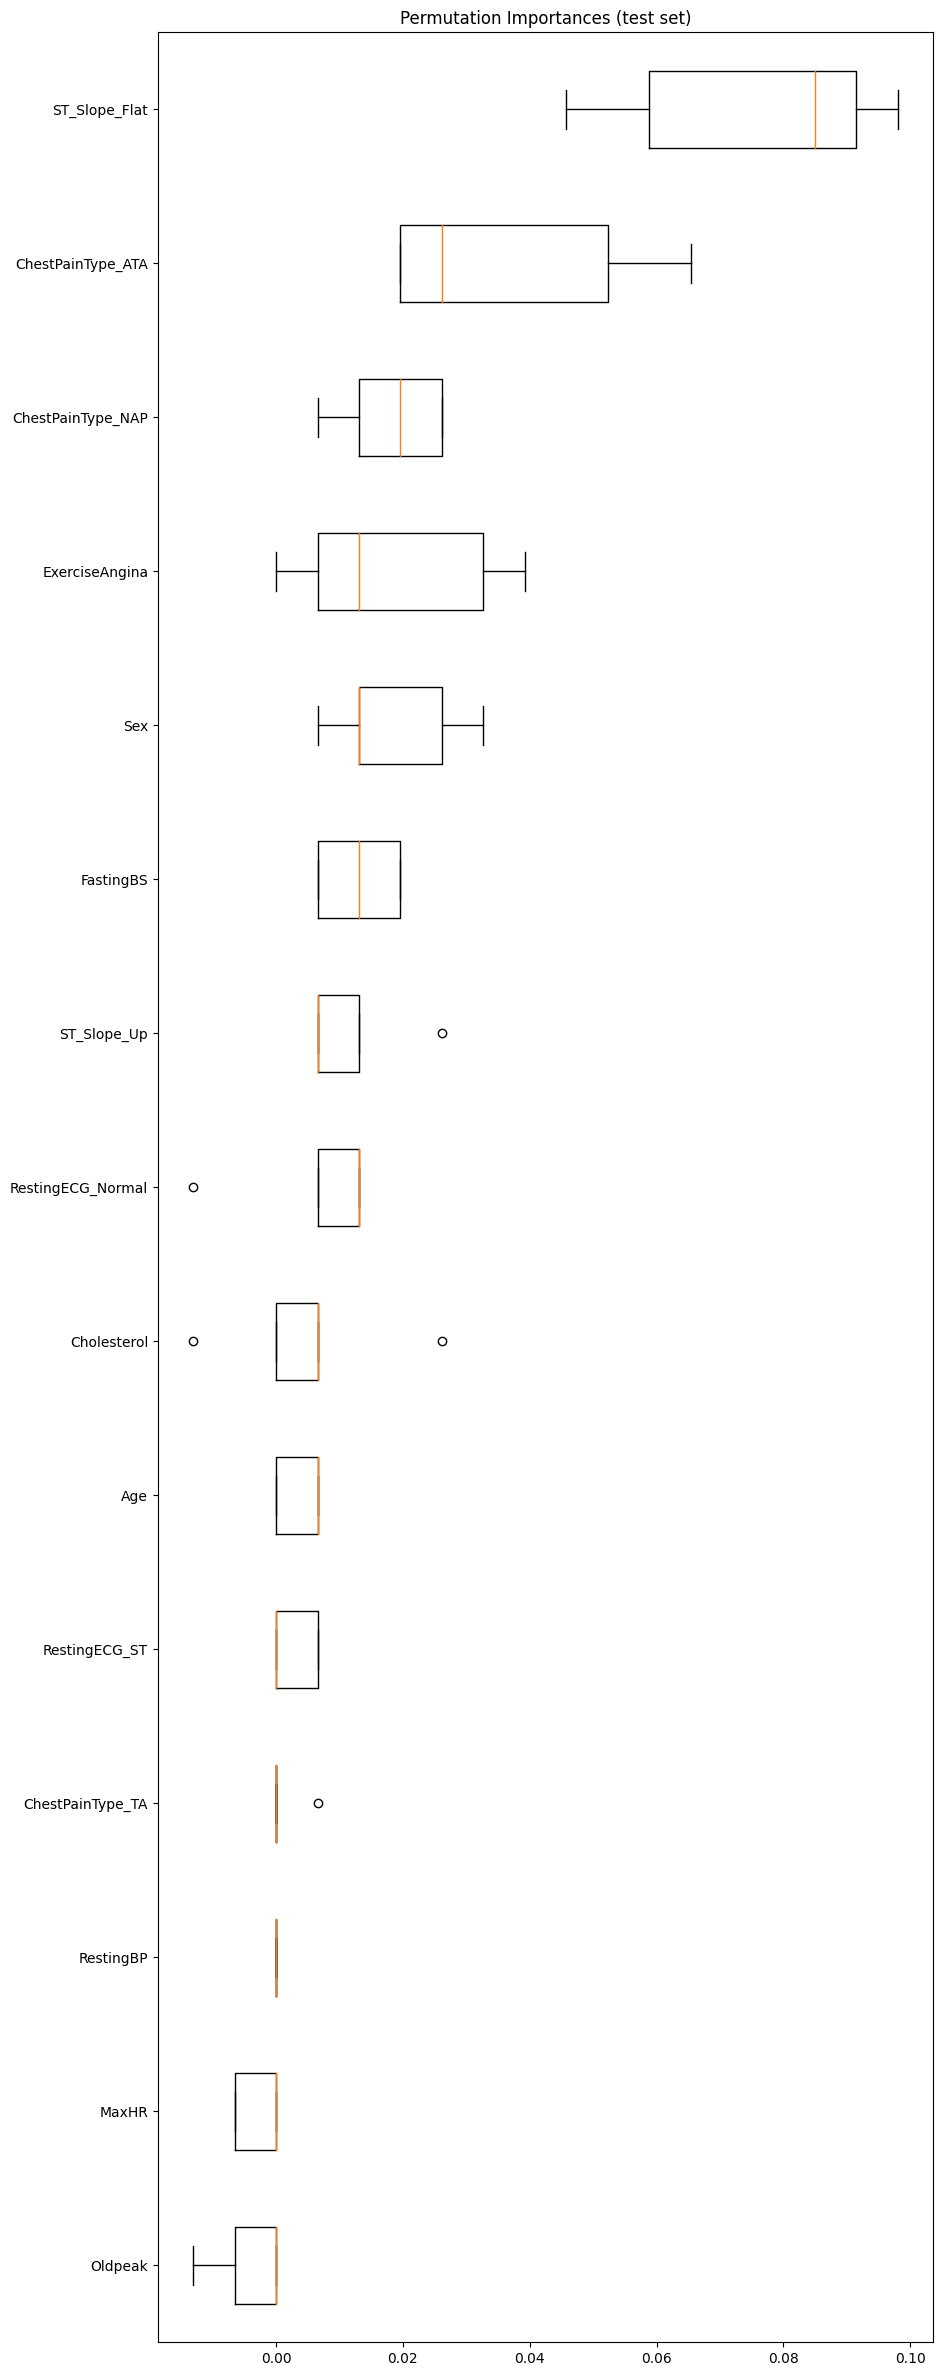

In [ ]:
fig= plt.figure(figsize=(10,30))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False,
            labels=X_test.columns[perm_sorted_idx])
plt.title("Permutation Importances (test set)");

In [ ]:
vari = list(X_test.columns[perm_sorted_idx][-5:])

In [ ]:
print('The change in these variables results in a drop of the recall - sensitivity, so this variables are important for the results ')
for x in vari:
  print(x)

The change in these variables results in a drop of the recall - sensitivity, so this variables are important for the results 
Sex
ExerciseAngina
ChestPainType_NAP
ChestPainType_ATA
ST_Slope_Flat


Se encontró que ambos modelos ofrecen un desempeño muy similar, sin embargo, como se observó en la validación cruzada, los modelos de SVM tuvieron una variación menor, es decir, sus resultados son más consistentes, por lo que finalmente el modelo selccionado es el basado en SVM.

El modelo seleccionado permite hacer una clasificación con un buen desempeño basados en la medida de recall, lo que nos habilita para identificar los casos en que efectivamente un paciente presentará una enfermedad cardiovascular.

## Conclusiones

* Se contruyó una solución en la cual se probaron distintos modelos de clasificación, hasta obtener aquel de mejor desempeño y con hiperparámetros optimizados.

* Los modelos presentaron un buen desempeño, a pesar de no contar con una gran cantidad de datos.

* El dataset estaba constituido por variables numéricas y categóricas, por lo que fue necesario hacer tranformación de variables antes de pasar los datos a los modelos para su entrenamiento.

* Los datos numéricos presentaban algunos valores atípicos.

* Se comprobó estadísticamente la influencia de las variables predictoras sobre la variable objetivo.

* La comparación de modelos mediante validación cruzada permite determinar que tan sensible es el modelo cuando se cambia el dataset de entrenamiento, evitando el sobre ajuste. Al graficar los resultados podemos descartar modelos de mal desempeño o con desempeño bueno pero que presensan valores atípicos con cierto grupo de los datos de entrenamiento (alta variación).

* En general, el modelo seleccionado presenta un desempeño bueno durante su entrenamiento y a su vez un desempeño similar con los datos de prueba, por lo que hay evidencia para afirmar que el modelo seleccionado es capáz de generalizar bien con datos desconocidos. Además, no se aprecia un sesgo marcado en las predicciones hacia alguna clase en particular (en la matriz de confusión la gran mayoría de las predicciones se ubican en la diagonal y los errores no estan cargados sobre ninguna clase) y se observa que el desempeño del modelo mejora luego de optimizar sus hiperparámetros, por lo que se concluye que éste es un paso que agrega valor al resultado final obtenido.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3c816ad7-61ca-4f08-8439-3dc1ab79ec9a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>